In [109]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


### Данные

In [101]:
data = pd.read_csv('Student_Performance.csv')
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


**Загрузили датасет**

In [102]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


**Получили описание датасета:**
+ 6 столбцов:
    + Hours Studied (кол-во часов учебы)
    + Previous Scores (баллы, полученные в предыдущих тестах)
    + Extracurricular Activities (внеклассные занятия да/нет)
    + Sleep Hours (кол-во часов сна)
    + Sample Question Papers Practiced (примеры отработанных заданий)
    + Performance Index (успеваемость)
+ 10000 строк 

### Визуализация данных

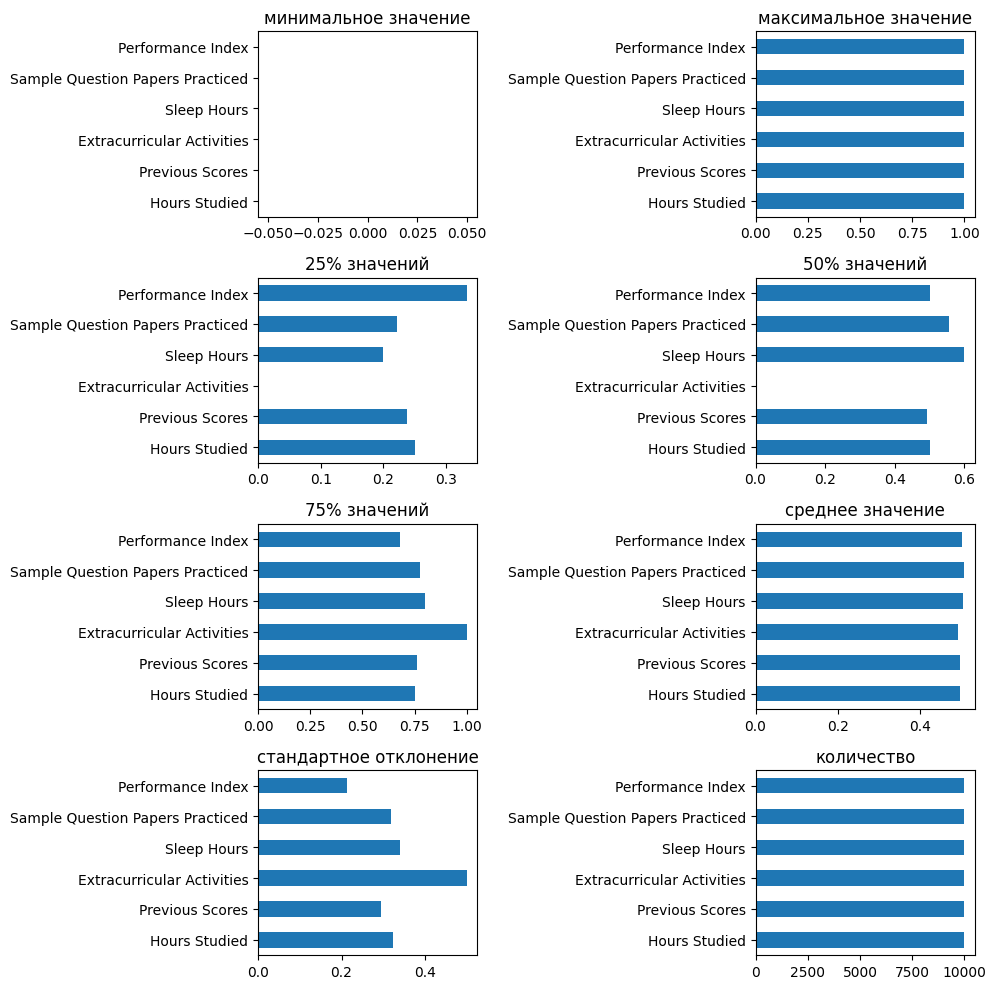

In [105]:
statistic = data.describe()

# Выбор нужных статистик
mean_values = statistic.loc['mean']
std_values = statistic.loc['std']
count_values = statistic.loc['count']
min_values = statistic.loc['min']
quarter_values = statistic.loc['25%']
half_values = statistic.loc['50%']
three_quarters_values = statistic.loc['75%']
max_values = statistic.loc['max']

value_array = [min_values, max_values, quarter_values, half_values, three_quarters_values, mean_values, std_values, count_values]
graf_names = ['минимальное значение', 'максимальное значение',
              '25% значений', '50% значений',
              '75% значений', 'среднее значение',
              'стандартное отклонение', 'количество']

# Размер графика
plt.figure(figsize=(10, 10))

for i in range(1, 9):
    plt.subplot(4, 2, i)
    value_array[i-1].plot(kind='barh')
    plt.title(graf_names[i-1])   

plt.tight_layout()
plt.show()

### Предварительная обработка данных

1. Для **обработки отсутствующих значений** используем *.dropna()*. Эта функция удаляет строки, если в них есть пустые значения
2. Модели машинного обучения работают только с числовыми данными, поэтому **категориальные признаки** нужно преобразовать в числовые. Для этого есть два метода:
    + One-Hot Encoding: преобразует каждое категориальное значение в отдельную бинарную колонку. Для каждого уникального значения создается новая колонка с 0 или 1, показывающее, присутствует ли это значение.
    + Label Encoding: преобразует категориальные значения в числовые. Каждый уникальный категориальный элемент получает свое числовое значение. Больше подходит для бинарных данных, поэтому выберем этот способ для столбца Extracurricular Activities.
3. **Нормировка данных** (нормализация) - процесс преобразования значений числовых признаков так, чтобы они находились в одном диапазоне. Это важно, так как линейная регрессия чувствительна к разбросам. Есть два метода нормализации данных:
    + Min-Max Scaling: преобразует данные так, чтобы они находились в заданном диапазоне (обычно \[0, 1])
        + Чувствителен к выбросам: выбросы существенно меняют диапазон, а значит и нормализованные значения
        + Не подходит для данных с сильно различающимися диапазонами
    + Standardization (Z-score Normalization): преобразует данные так, чтобы они имели среднее значение 0 и стандартное отклонение 1
        + Не чувствителен к выбросам, так как использует среднее и стандартное отклонение

In [108]:
# Обработка отсутствующих значений (удаляет строки с отсутствующими значениями)
data = data.dropna()

# Применяем кодирование для Extracurricular Activities
data['Extracurricular Activities'] = LabelEncoder().fit_transform(data['Extracurricular Activities'])

# Нормировка данных
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.775188,1.704176,1.010455,1.456205,-1.249754,1.862167
1,-0.383481,0.723913,-0.989654,-1.492294,-0.900982,0.508818
2,1.161410,-1.063626,1.010455,0.276805,-0.900982,-0.532220
3,0.002742,-1.005963,1.010455,-0.902594,-0.900982,-1.000687
4,0.775188,0.320275,-0.989654,0.866505,0.145333,0.560870
...,...,...,...,...,...,...
9995,-1.542149,-1.178951,1.010455,-1.492294,-0.900982,-1.677362
9996,0.775188,-0.314013,1.010455,0.866505,0.145333,0.144454
9997,0.388965,0.781575,1.010455,0.866505,0.145333,0.977285
9998,1.547633,1.588851,1.010455,0.276805,-1.598526,2.070374


### Разделение данных на обучающие и тестовые

Разделение данных происходит при помощи функции *train_test_split()*, которая разделяет датафреймы на случайные обучающие и тестовые наборы.
+ test_size=0.2 - 20% данных пойдут в тестовый набор, остальное в обучающий
+ random_state=42 - позволяет получать одинаковые результаты при каждом запуске кода

In [110]:
X = data.drop('Performance Index', axis=1) # все признаки кроме целевого
y = data['Performance Index'] # целевой признак

# Разделение на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)